# Journal club: kidney disease

"Journal clubs" are a common type of meeting in both academic settings and, for data scientists at least, professional settings as well. Journal clubs are useful for:

- Finding new, useful statistical methods to tackle relevant problems
- Reviewing the work of peers and competitors who publish their work
- Discussing what is good and bad about statistical and experimental methodologies
- Building a collaborative environment with your fellow data scientists

---

In this notebook you will be reviewing a paper on **kidney disease**.

The paper itself is located:

[Kidney disease paper on website](http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

[Kidney disease paper local file](./chronic_kidney_disease.pdf)
    
The dataset associated with the paper:

[Dataset: chronic kidney disease](./chronic_kidney_disease_full.csv)
    
And the codebook for the dataaset is located:

[Codebook](./chronic_kidney_disease_header.txt)

---

This lesson/lab is broken up into 4 sections:

**Section 1**: Read the paper!

**Section 2**: Discuss and respond to the questions about the paper.

**Section 3**: [BONUS] Load the data and perform your own logistic regression OR kNN with cross-validation.

**Section 4**: Briefly present to the class your review and opinions of the paper.

___

## 1. Read the paper, focusing on the goals, methodology, and conclusions.

___

## 2. Discuss and respond to the following questions.

### 2.1.  What is the goal of the study? (hint: this is usually described in the abstract)

A: Comparison of SVM and KNN when predicting chronic kidney disease.

### 2.2 What is the target variable? (hint: look at the website and dataset)

A: CKD (binary representation of presence of chronic kidney disease)

### 2.3. What models do they compare? (hint: although you have not yet seen all of them, try to grasp the differences)

A: K-nearest neighbor and support vector machines

### 2.4. How do they judge the "goodness" of a model? Do they use accuracy? if not, what do they use?

A: Precision


### 2.5. What validation method do they use? Simple train/test split? Cross Validation?

A: Train/test split

### 2.6. How could the paper be improved? 

**Consider:**

- Is the text well organized?
- Are the methods clear?
- Are the results clear?
- Are the graphs easy to understand?

A: Correct mistakes. Fix spelling and grammar. Add parameters for models. Improve graph labeling. Use cross-validation. Add more detail.

---

## 3. [BONUS] Load the data and perform your own classification using logistic regression or kNN.

Validate with cross-validation and a scoring metric of your choice.

In [1]:
import pandas as pd

In [2]:
ckd_raw = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/curriculum/week-05/2.3-journal-club-logistic-knn/kidney-disease/chronic_kidney_disease_full.csv')

In [3]:
pd.options.display.max_columns = 30

ckd = ckd_raw.fillna('NA')
# ckd = ckd_raw
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NA,normal,notpresent,notpresent,121,36,1.2,NA,NA,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NA,normal,notpresent,notpresent,NA,18,0.8,NA,NA,11.3,38,6000,NA,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NA,NA,9.6,31,7500,NA,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NA,NA,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16, 8))
# sns.heatmap(ckd.corr(), annot=True)

In [5]:
str(ckd.columns.values).replace("'", "").replace(' ', '+')

'[age+bp+sg+al+su+rbc+pc+pcc+ba+bgr+bu+sc+sod\n+pot+hemo+pcv+wbcc+rbcc+htn+dm+cad+appet+pe+ane\n+class]'

In [6]:
ckd2 = ckd.rename(columns = {'class':'clas'})

In [7]:
ckd2['clas'].unique()
ckd2['clas'] = ckd2['clas'].apply(lambda x: 1 if x == 'ckd' else 0)
ckd2.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,clas
0,48,80,1.02,1,0,NA,normal,notpresent,notpresent,121,36,1.2,NA,NA,15.4,44,7800,5.2,yes,yes,no,good,no,no,1
1,7,50,1.02,4,0,NA,normal,notpresent,notpresent,NA,18,0.8,NA,NA,11.3,38,6000,NA,no,no,no,good,no,no,1
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NA,NA,9.6,31,7500,NA,no,yes,no,poor,no,yes,1
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NA,NA,11.6,35,7300,4.6,no,no,no,good,no,no,1


In [8]:
import patsy

# formula = 'clas~age+bp+sg+C(al)+C(su)+C(rbc)+C(pc)+C(pcc)+C(ba)+bgr+bu+sc+sod+pot+hemo+pcv+wbcc+rbcc+C(htn)+C(dm)+C(cad)+C(appet)+C(pe)+C(ane)-1'
# formula = 'clas~age+bp+sg+C(al)+C(su)+C(rbc)+C(pc)+C(pcc)+C(ba)+bgr+bu+sc+sod+pot+hemo+C(htn)+C(dm)+C(cad)+C(appet)+C(pe)+C(ane)-1'
# formula = 'clas~age+bp+sg+C(al)+C(su)+C(rbc)+C(pc)+C(pcc)+C(ba)+bgr+bu+sc+C(htn)+C(dm)+C(cad)+C(appet)+C(pe)+C(ane)-1'
# formula = 'clas~age+bp+C(al)+C(su)+C(rbc)+C(pc)+C(pcc)+C(ba)+bgr+bu+sc+C(htn)+C(dm)+C(cad)+C(appet)+C(pe)+C(ane)-1'
# formula = 'clas~sg-1'
formula = 'clas~age-1'
y, X = patsy.dmatrices(formula, data=ckd2, return_type='dataframe')

In [9]:
print y.shape
print X.shape

(400, 1)
(400, 77)


In [10]:
pd.DataFrame(X.columns).T.values

array([['age[2.0]', 'age[3.0]', 'age[4.0]', 'age[5.0]', 'age[6.0]',
        'age[7.0]', 'age[8.0]', 'age[11.0]', 'age[12.0]', 'age[14.0]',
        'age[15.0]', 'age[17.0]', 'age[19.0]', 'age[20.0]', 'age[21.0]',
        'age[22.0]', 'age[23.0]', 'age[24.0]', 'age[25.0]', 'age[26.0]',
        'age[27.0]', 'age[28.0]', 'age[29.0]', 'age[30.0]', 'age[32.0]',
        'age[33.0]', 'age[34.0]', 'age[35.0]', 'age[36.0]', 'age[37.0]',
        'age[38.0]', 'age[39.0]', 'age[40.0]', 'age[41.0]', 'age[42.0]',
        'age[43.0]', 'age[44.0]', 'age[45.0]', 'age[46.0]', 'age[47.0]',
        'age[48.0]', 'age[49.0]', 'age[50.0]', 'age[51.0]', 'age[52.0]',
        'age[53.0]', 'age[54.0]', 'age[55.0]', 'age[56.0]', 'age[57.0]',
        'age[58.0]', 'age[59.0]', 'age[60.0]', 'age[61.0]', 'age[62.0]',
        'age[63.0]', 'age[64.0]', 'age[65.0]', 'age[66.0]', 'age[67.0]',
        'age[68.0]', 'age[69.0]', 'age[70.0]', 'age[71.0]', 'age[72.0]',
        'age[73.0]', 'age[74.0]', 'age[75.0]', 'age[76.0]'

In [11]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import numpy as np

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(320, 77) (320,)
(80, 77) (80,)


In [12]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

logreg = LogisticRegressionCV(cv=5, n_jobs=1, verbose=1)
# Fit the data points into the LogisticRegression model
model = logreg.fit(X_train, y_train)
# Predict Probability
probabilities = model.predict_proba(X_test)
# Score the model
score = model.score(X_test, y_test)
print 'Model Score: ', score
# print model.scores_[1.0]
print [np.mean(cv) for cv in model.scores_[1.0]]

Model Score:  0.65
[0.61538461538461531, 0.6430769230769231, 0.62656250000000002, 0.66031746031746041, 0.68412698412698414]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


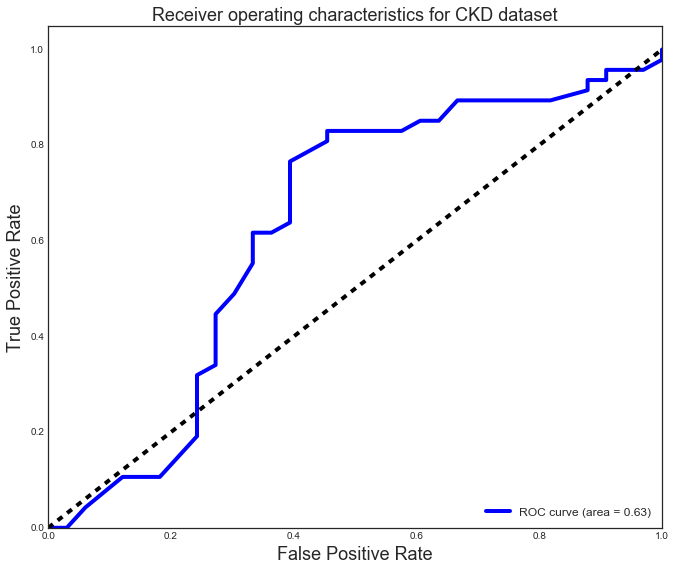

In [13]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# I am assigning the 1st offsets to my FPR / TPR from the 2nd set of probabiliies from my
# .predict_proba() predictions
# This data is what will be plotted once we throw it to our figure
FPR[1], TPR[1], _ = roc_curve(y_test, probabilities[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# 1. Initialize a blank plot, aspect 11x9
plt.figure(figsize=[11,9])
# 2. Plot my false and true rates (returned from roc_curve function)
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
# 3. Plotting a dotted line diagonally, representing the .5
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristics for CKD dataset', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [14]:
summary = pd.DataFrame(zip(model.coef_[0], X_train.columns))
summary.sort_values(0, ascending=False)

,0,1
59,7.825154,age[67.0]
68,7.661386,age[76.0]
60,7.658999,age[68.0]
62,7.455548,age[70.0]
6,7.198054,age[8.0]
3,6.935915,age[5.0]
14,6.827736,age[21.0]
4,6.250455,age[6.0]
72,6.250455,age[81.0]
0,6.248977,age[2.0]


---

## 4. Discuss and prepare to briefly present your review to the class.